In [1]:
import cobra
from cobra.io import load_model

In [2]:
ecoli_core = load_model("e_coli_core")
ecoli_core

Name,e_coli_core
Memory address,732dbc51c640
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


In [4]:
ecoli_core.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

In [3]:
s_matrix = cobra.util.array.create_stoichiometric_matrix(
    model=ecoli_core, array_type="DataFrame"
)
s_matrix

,PFK,PFL,PGI,PGK,PGL,ACALD,AKGt2r,PGM,PIt2r,ALCD2x,...,MALS,MALt2_2,MDH,ME1,ME2,NADH16,NADTRHD,NH4t,O2t,PDH
glc__D_e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gln__L_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gln__L_e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
glu__L_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
glu__L_e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fru_e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fum_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fum_e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g3p_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Collecting all the pathway associated with the PGI reaction

In [5]:
ecoli_core.reactions.PGI.metabolites

{<Metabolite g6p_c at 0x161cdea00>: -1.0,
 <Metabolite f6p_c at 0x161cde250>: 1.0}

In [6]:
# Step 1: Identify the metabolites in the PGI reaction
pgi_metabolites = ecoli_core.reactions.PGI.metabolites

# Step 2: For each metabolite, find all reactions that involve it
pathway_reactions = set()
for metabolite in pgi_metabolites:
    reactions = metabolite.reactions
    pathway_reactions.update(reactions)

# Now, pathway_reactions contains all reactions associated with the metabolites of the PGI reaction

In [12]:
pathway_reactions

{<Reaction BIOMASS_Ecoli_core_w_GAM at 0x161d58100>,
 <Reaction FBP at 0x161e0f220>,
 <Reaction FRUpts2 at 0x161e22340>,
 <Reaction G6PDH2r at 0x161e29730>,
 <Reaction GLCpts at 0x161e32a60>,
 <Reaction PFK at 0x161d04700>,
 <Reaction PGI at 0x161d04e50>,
 <Reaction TALA at 0x161df6eb0>,
 <Reaction TKT2 at 0x161dfdbb0>}

In [18]:
path_names = [x.id.lstrip() for x in pathway_reactions]
target_pathways = s_matrix.loc[:, path_names]

target_pathways

,FBP,PGI,GLCpts,TALA,BIOMASS_Ecoli_core_w_GAM,PFK,G6PDH2r,FRUpts2,TKT2
glc__D_e,0.0,0.0,-1.0,0.0,0.0000,0.0,0.0,0.0,0.0
gln__L_c,0.0,0.0,0.0,0.0,-0.2557,0.0,0.0,0.0,0.0
gln__L_e,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
glu__L_c,0.0,0.0,0.0,0.0,-4.9414,0.0,0.0,0.0,0.0
glu__L_e,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
fru_e,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,-1.0,0.0
fum_c,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
fum_e,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
g3p_c,0.0,0.0,0.0,-1.0,-0.1290,0.0,0.0,0.0,1.0


In [27]:
import numpy as np

# Example S-matrix as a NumPy array
# Rows: Compounds, Columns: Reactions
S_matrix = np.array([[-1, 1, 0], [0, -1, 1], [1, 0, -1]])

compounds = ["C1", "C2", "C3"]
reactions = ["R1", "R2", "R3"]

In [28]:
import networkx as nx


def build_graph(S_matrix, compounds, reactions):
    G = nx.DiGraph()

    # Add compound nodes
    for cpd in compounds:
        G.add_node(cpd, type="compound")

    # Add reaction nodes and edges
    for j, rxn in enumerate(reactions):
        G.add_node(rxn, type="reaction")
        for i, cpd in enumerate(compounds):
            stoichiometry = S_matrix[i, j]
            if stoichiometry < 0:
                G.add_edge(cpd, rxn, weight=-stoichiometry)  # Reactant
            elif stoichiometry > 0:
                G.add_edge(rxn, cpd, weight=stoichiometry)  # Product

    return G


G = build_graph(S_matrix, compounds, reactions)

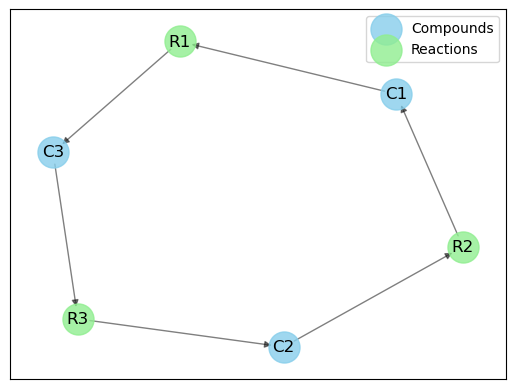

In [29]:
import matplotlib.pyplot as plt


def visualize_graph(G):
    pos = nx.spring_layout(G)  # Positions for all nodes

    # Draw nodes
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=[n for n in G.nodes if G.nodes[n]["type"] == "compound"],
        node_color="skyblue",
        node_size=500,
        alpha=0.8,
        label="Compounds",
    )
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=[n for n in G.nodes if G.nodes[n]["type"] == "reaction"],
        node_color="lightgreen",
        node_size=500,
        alpha=0.8,
        label="Reactions",
    )

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.legend()
    plt.show()


visualize_graph(G)

Hierachical try

In [32]:
import numpy as np

compounds = [
    "Glucose",
    "ATP",
    "Glucose-6-phosphate",
    "ADP",
    "Fructose-6-phosphate",
    "Fructose-1,6-bisphosphate",
    "Glyceraldehyde-3-phosphate",
    "Dihydroxyacetone phosphate",
    "NAD+",
    "Pi",
    "1,3-Bisphosphoglycerate",
    "NADH",
    "H+",
    "3-Phosphoglycerate",
    "2-Phosphoglycerate",
    "Phosphoenolpyruvate",
    "H2O",
    "Pyruvate",
]

reactions = ["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10"]

# Stoichiometric matrix for glycolysis
S_matrix = np.array(
    [
        [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Glucose
        [-1, 0, -1, 0, 0, 0, 0, 0, 0, -1],  # ATP
        [1, -1, 0, 0, 0, 0, 0, 0, 0, 0],  # Glucose-6-phosphate
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],  # ADP
        [0, 1, -1, 0, 0, 0, 0, 0, 0, 0],  # Fructose-6-phosphate
        [0, 0, 1, -1, 0, 0, 0, 0, 0, 0],  # Fructose-1,6-bisphosphate
        [0, 0, 0, 1, -1, -1, 0, 0, 0, 0],  # Glyceraldehyde-3-phosphate
        [0, 0, 0, 1, -1, 0, 0, 0, 0, 0],  # Dihydroxyacetone phosphate
        [0, 0, 0, 0, 0, -1, 1, 0, 0, 0],  # NAD+
        [0, 0, 0, 0, 0, -1, 1, 0, 0, 0],  # Pi
        [0, 0, 0, 0, 0, 1, -1, 0, 0, 0],  # 1,3-Bisphosphoglycerate
        [0, 0, 0, 0, 0, 1, -1, 0, 0, 0],  # NADH
        [0, 0, 0, 0, 0, 1, -1, 0, 0, 0],  # H+
        [0, 0, 0, 0, 0, 0, 1, -1, 0, 0],  # 3-Phosphoglycerate
        [0, 0, 0, 0, 0, 0, 0, 1, -1, 0],  # 2-Phosphoglycerate
        [0, 0, 0, 0, 0, 0, 0, 0, 1, -1],  # Phosphoenolpyruvate
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # H2O
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Pyruvate
    ]
)

In [33]:
import networkx as nx


def build_hierarchical_graph(S_matrix, compounds, reactions):
    G = nx.DiGraph()

    # Add compound nodes
    for cpd in compounds:
        G.add_node(cpd, type="compound")

    # Add reaction nodes and edges
    for j, rxn in enumerate(reactions):
        G.add_node(rxn, type="reaction")
        for i, cpd in enumerate(compounds):
            stoichiometry = S_matrix[i, j]
            if stoichiometry < 0:
                G.add_edge(cpd, rxn, weight=-stoichiometry)  # Reactant
            elif stoichiometry > 0:
                G.add_edge(rxn, cpd, weight=stoichiometry)  # Product

    return G


G = build_hierarchical_graph(S_matrix, compounds, reactions)

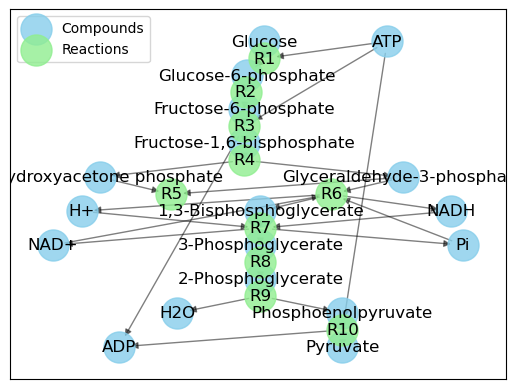

In [35]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout


def visualize_hierarchical_graph(G):
    pos = graphviz_layout(G, prog="dot")  # Hierarchical layout

    # Draw nodes
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=[n for n in G.nodes if G.nodes[n]["type"] == "compound"],
        node_color="skyblue",
        node_size=500,
        alpha=0.8,
        label="Compounds",
    )
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=[n for n in G.nodes if G.nodes[n]["type"] == "reaction"],
        node_color="lightgreen",
        node_size=500,
        alpha=0.8,
        label="Reactions",
    )

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.legend()
    plt.show()


visualize_hierarchical_graph(G)

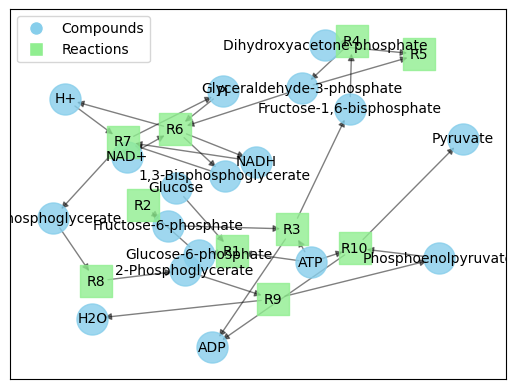

In [36]:
import networkx as nx
import matplotlib.pyplot as plt


def build_hierarchical_graph(S_matrix, compounds, reactions):
    G = nx.DiGraph()

    # Add compound nodes
    for cpd in compounds:
        G.add_node(cpd, type="compound", label=cpd)

    # Add reaction nodes and edges
    for j, rxn in enumerate(reactions):
        G.add_node(rxn, type="reaction", label=rxn)
        for i, cpd in enumerate(compounds):
            stoichiometry = S_matrix[i, j]
            if stoichiometry < 0:
                G.add_edge(cpd, rxn, weight=-stoichiometry)  # Reactant
            elif stoichiometry > 0:
                G.add_edge(rxn, cpd, weight=stoichiometry)  # Product

    return G


G = build_hierarchical_graph(S_matrix, compounds, reactions)


def visualize_organic_graph(G):
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Force-directed layout

    # Draw nodes
    compound_nodes = [n for n in G.nodes if G.nodes[n]["type"] == "compound"]
    reaction_nodes = [n for n in G.nodes if G.nodes[n]["type"] == "reaction"]

    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=compound_nodes,
        node_color="skyblue",
        node_shape="o",
        node_size=500,
        alpha=0.8,
        label="Compounds",
    )
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=reaction_nodes,
        node_color="lightgreen",
        node_shape="s",
        node_size=500,
        alpha=0.8,
        label="Reactions",
    )

    # Draw edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Create legend
    compound_patch = plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Compounds",
        markerfacecolor="skyblue",
        markersize=10,
    )
    reaction_patch = plt.Line2D(
        [0],
        [0],
        marker="s",
        color="w",
        label="Reactions",
        markerfacecolor="lightgreen",
        markersize=10,
    )
    plt.legend(handles=[compound_patch, reaction_patch], loc="best")

    plt.show()


visualize_organic_graph(G)